# MINI_Project(Classification)

# Business objective

### 1.Build a predictive model to determine which customers are likely to churn (leave the bank)
### 2.Given a set of customer record, determine the probabilities of churn for each customer




# Import required Python libraries

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 


# Load the dataset

In [2]:
df=pd.read_csv('Classification_BankChurn_Data_Project.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check the structure of data

In [3]:
df.shape #1 shape()

(10000, 13)

# Summarise the data

In [4]:
df.describe() #2 summarize the data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.drop([ "CustomerId", "Surname"], axis = 1,inplace=True)

# Check if there is any missing value

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Checking data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
categorical_data = df.select_dtypes(exclude=[np.number])
numerical_data = df.select_dtypes(include=[np.number])

In [10]:
for cols in categorical_data.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
--------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------


In [11]:
df1=df.copy()

In [12]:
df1.Geography.replace(to_replace='france',value='France',inplace=True)
df1.Geography.replace(to_replace='fra',value='France',inplace=True)
df1.Geography.replace(to_replace='ger',value='Germany',inplace=True)
df1.Geography.replace(to_replace='germany',value='Germany',inplace=True)
df1.Geography.replace(to_replace='gernamy',value='Germany',inplace=True)
df1.Geography.replace(to_replace='GERMANY',value='Germany',inplace=True)
df1.Geography.replace(to_replace='spain',value='Spain',inplace=True)
df1.Geography.replace(to_replace='espanio',value='Spain',inplace=True)

In [13]:
df1.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
for cols in numerical_data.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
--------------------
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
--------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
--------------------
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64
--------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
--------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
--------------------
1    5151
0    4849
Name: IsActiveMember, dtype: i

In [15]:
d=df1.copy() # clean data

# Data preprocessing

# Convert non-numeric labeled columns into categoncal type.

In [16]:
df1[['Geography','Gender']]=df1[['Geography','Gender']].astype('category')



In [17]:
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Use Label Encoder technique to convert categorical column into numerical type

In [18]:
# for category to numeric
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
# encode lables in column "species"
df1['Geography']=label_encoder.fit_transform(df1['Geography'])
df1['Gender']=label_encoder.fit_transform(df1['Gender'])

In [19]:
df1.drop(columns='Exited',axis=1,inplace=True)

# Perform the data scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)


In [21]:
scaled_df['Exited']=df.Exited

# Select the best features based on their correlation value

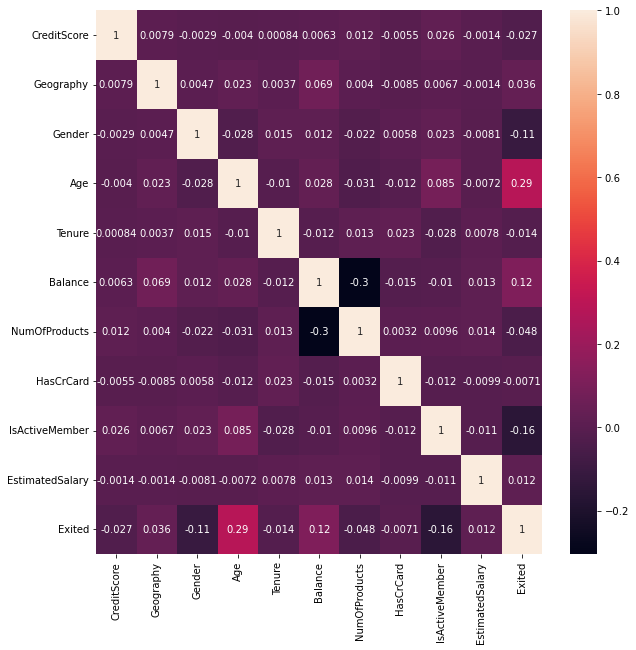

In [22]:
cor=scaled_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=cor,annot=True)
plt.show()

# Exploratory Data Analysis

In [23]:
d.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
d.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Univariate Analysis of Categorical Variable

In [25]:
def num_graph(n):
    print(d[n].describe())
    plt.figure(figsize=(15,5),facecolor='beige')
    print('                                   ', 'Distribution of ',d[n].name)
    #plt.suptitle(d[n])
    plt.subplot(131)
    sns.histplot(x = d[n], color = "red",bins=(10)) 
    plt.subplot(132)
    sns.boxplot(x = d[n], color = "brown") 
    plt.subplot(133)
    sns.kdeplot(x=d[n],color='green',shade=True)
    plt.show()
    

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
                                    Distribution of  CreditScore


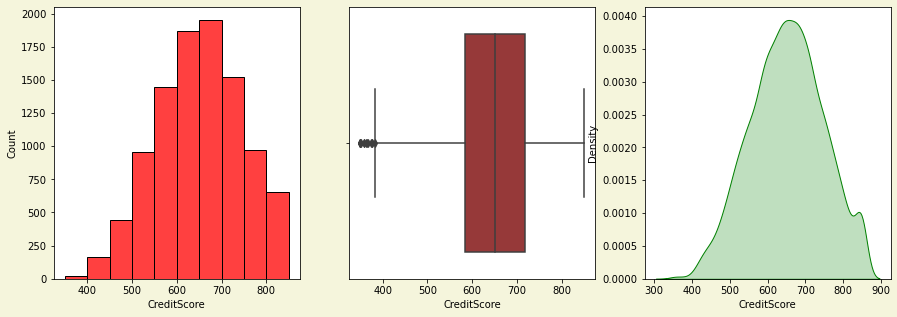

In [26]:
num_graph('CreditScore')

# Conclusion : Avgerage CreditScore is 650 and there are outliers present in CreditScore.

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
                                    Distribution of  Age


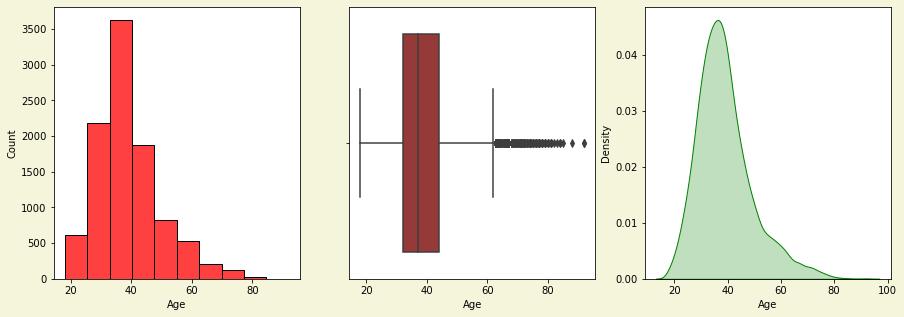

In [27]:
num_graph('Age')

# Conclusion : Mean age is 38 and there are outliers present in age.

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
                                    Distribution of  Tenure


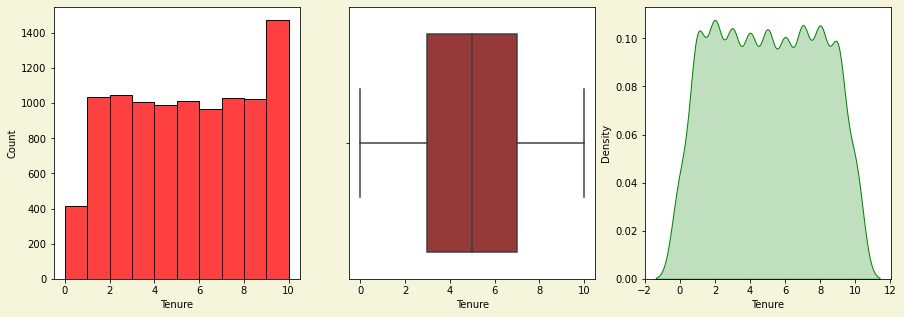

In [28]:
num_graph('Tenure')

# Conclusion : The tenure graph shows that clients with 10 years of tenure are max and are 1400 plus.

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
                                    Distribution of  Balance


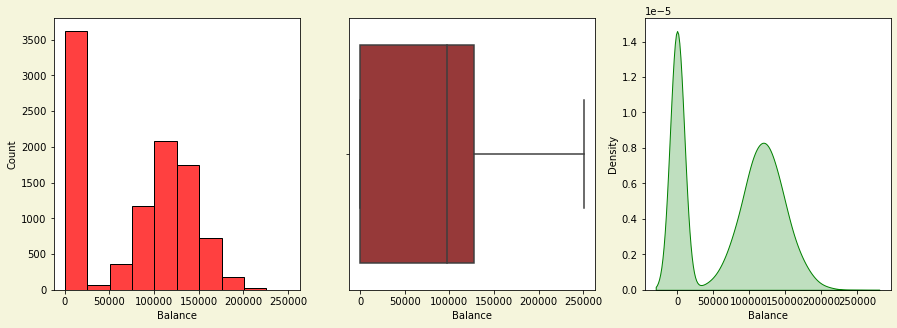

In [29]:
num_graph('Balance')

# Conclusion : Most of the accounts have balance 0 and mean balance is ~76000.

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64
                                    Distribution of  NumOfProducts


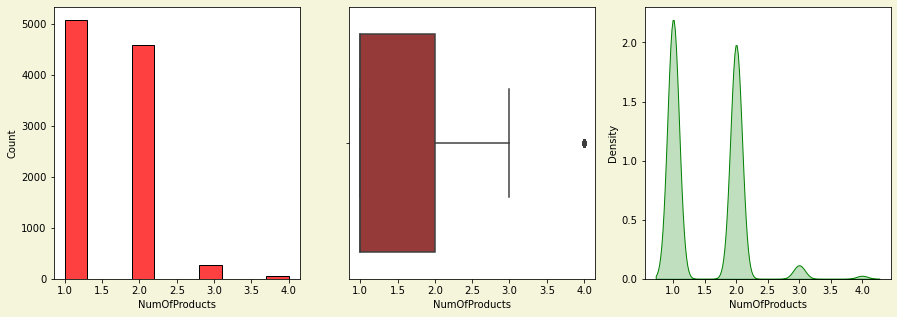

In [30]:
num_graph('NumOfProducts')

# Conclusion : Most used Number products are 1 and 2.

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
                                    Distribution of  EstimatedSalary


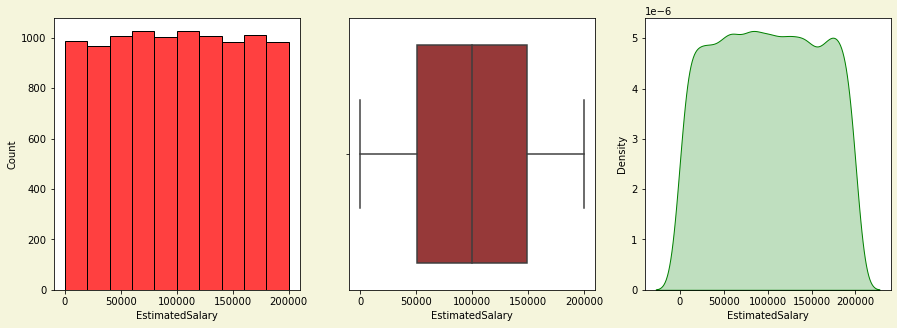

In [31]:
num_graph('EstimatedSalary')

# Conclusion :The EstimatedSalary is normally distributed and is almost same.

# Univariate analysis for Categorical variables

In [32]:
def cat_graph(c):
    print(d[c].value_counts())
    plt.figure(figsize=(15,7),facecolor='beige')
    print('                                   ', 'Distribution of ',d[c].name)
    plt.subplot(121)
    sns.countplot(y=d[c],ec='black',palette='gist_rainbow')
    plt.yticks(rotation=45)
    plt.subplot(122)
    perc=d[c].value_counts()
    lbl=list(d[c].value_counts().index)
    plt.pie(perc,labels=lbl,autopct='%.2f%%',startangle=50)
    plt.show()
    

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
                                    Distribution of  Geography


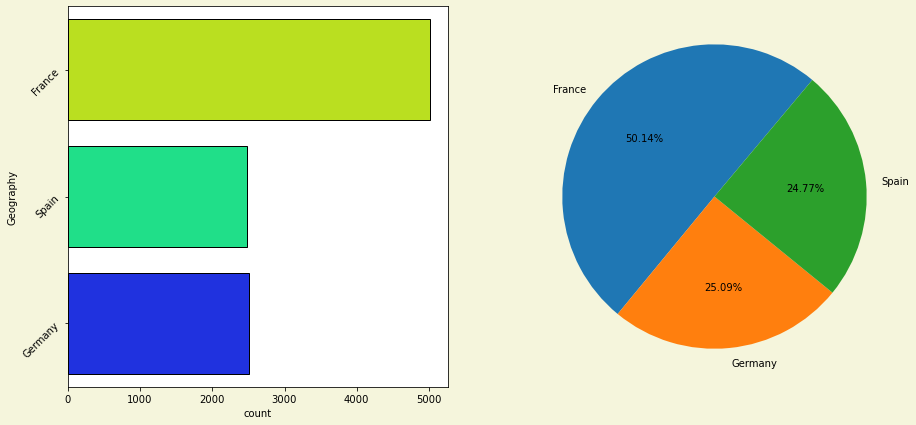

In [33]:
cat_graph('Geography')

# Conclusion: Most of the clients are from France.

Male      5457
Female    4543
Name: Gender, dtype: int64
                                    Distribution of  Gender


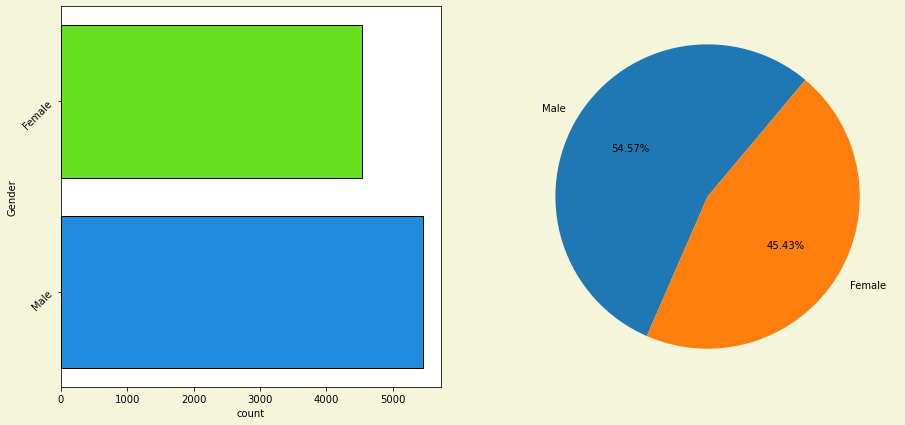

In [34]:
cat_graph('Gender')

# Conclusion : Male are in count compared to female.

1    7055
0    2945
Name: HasCrCard, dtype: int64
                                    Distribution of  HasCrCard


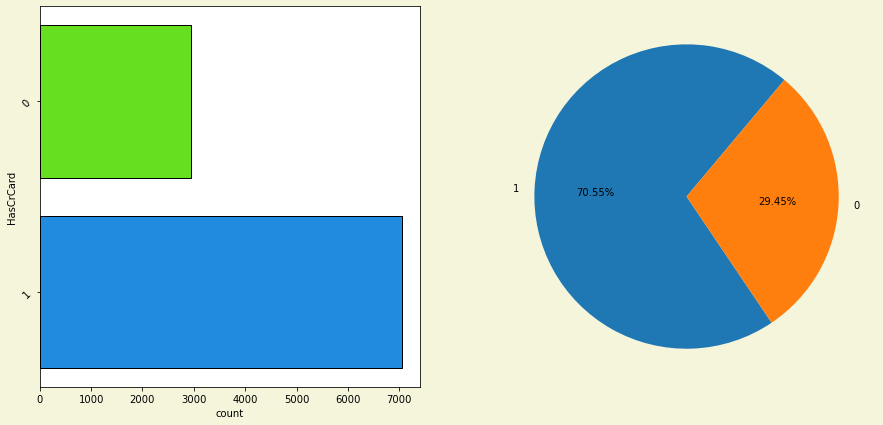

In [35]:
cat_graph('HasCrCard')

# Conclusion: 70.55% of clients have card.

1    5151
0    4849
Name: IsActiveMember, dtype: int64
                                    Distribution of  IsActiveMember


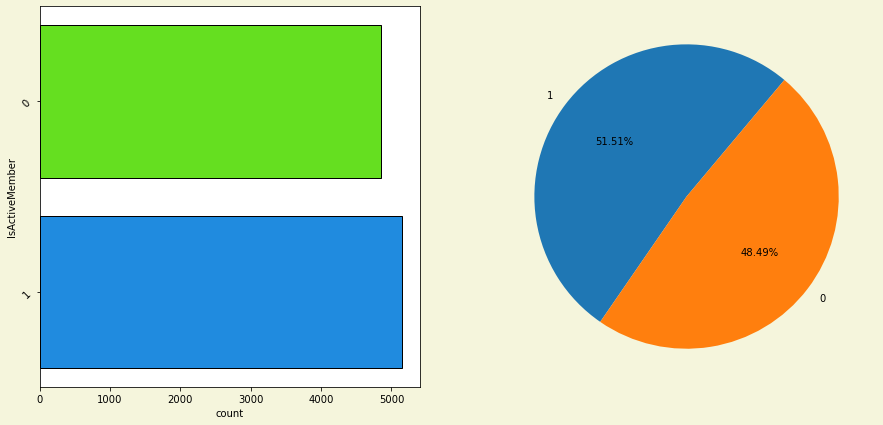

In [36]:
cat_graph('IsActiveMember')

# Conclusion : Both active and non active members are in same count.

0    7963
1    2037
Name: Exited, dtype: int64
                                    Distribution of  Exited


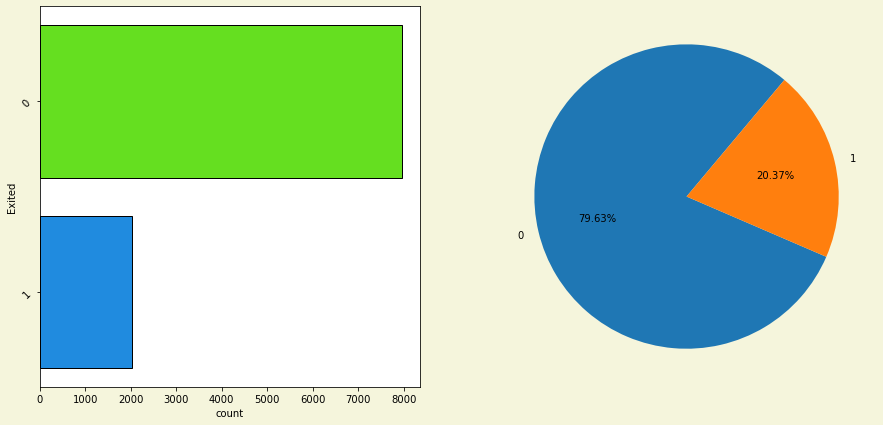

In [37]:
cat_graph('Exited')

# Conclusion : 79.63% are not Exited while 20.37% are Exited.

# Bi variate analysis

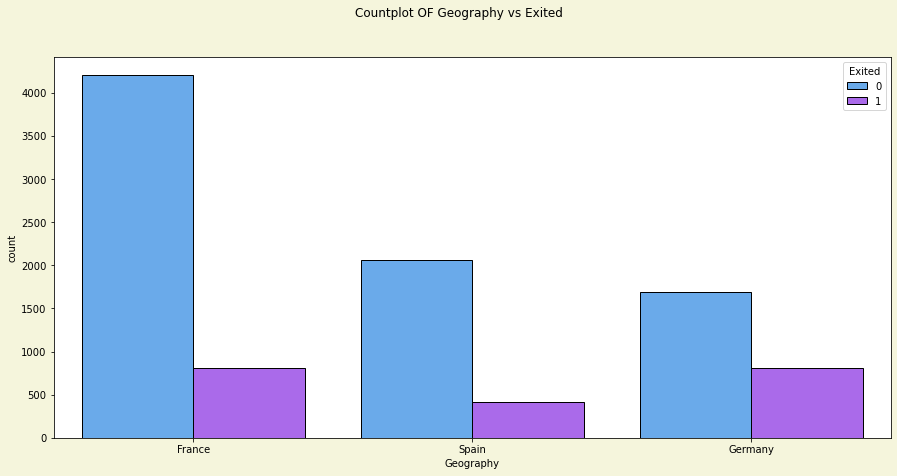

In [38]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Countplot OF Geography vs Exited')
sns.countplot(x='Geography', hue = 'Exited',data = d,ec='black',palette='cool');

# Conclusion: Germany has more Exited clients while France lowest.

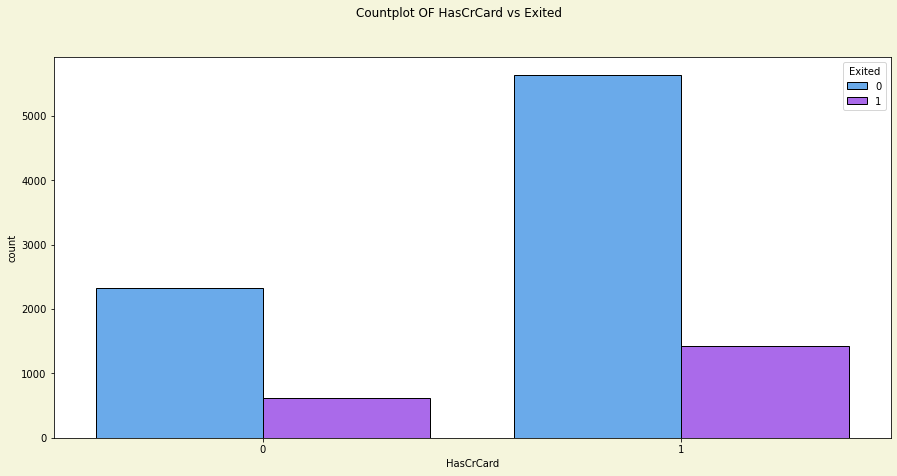

In [39]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Countplot OF HasCrCard vs Exited')
sns.countplot(x='HasCrCard', hue = 'Exited',data = d,ec='black',palette='cool');

# Conclusion: If we compare count of both People with card and without card who exited with people with card and without card who Not exited the Percent difference is more for the people who has no card.

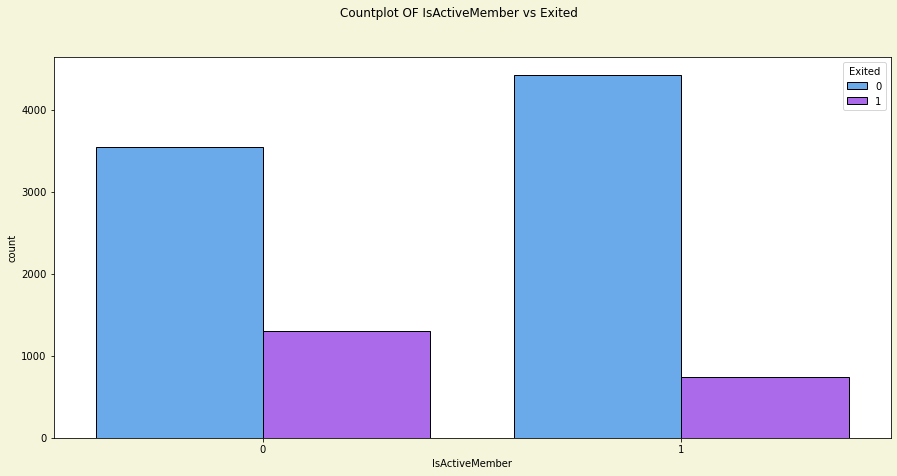

In [40]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Countplot OF IsActiveMember vs Exited')
sns.countplot(x='IsActiveMember', hue = 'Exited',data = d,ec='black',palette='cool');

# Conclusion : Not active member tend to exit more than people with active member.

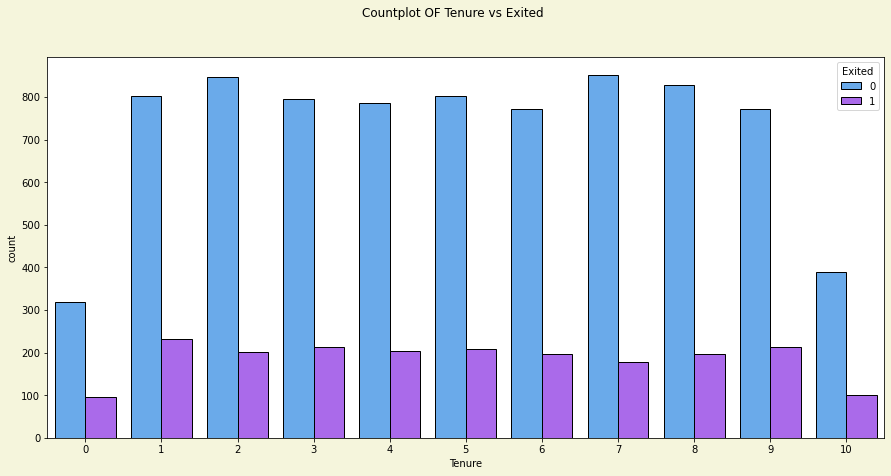

In [41]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Countplot OF Tenure vs Exited')
sns.countplot(data=d,x='Tenure',hue='Exited',palette='cool',ec='black');

# Conclusion : The people with tenure of 1-9 have almost same exited rate but the exit rate of people with 0 and 10 tenure is more if we compare it with the value counts of the people who did not exited.

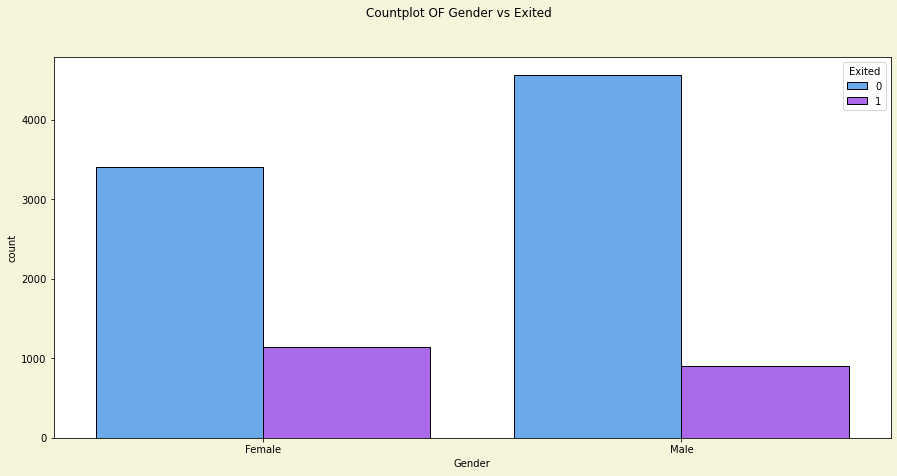

In [42]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Countplot OF Gender vs Exited')
sns.countplot(x='Gender', hue = 'Exited',data = d,ec='black',palette='cool');

# Conclusion : Female have more exited rate than male.

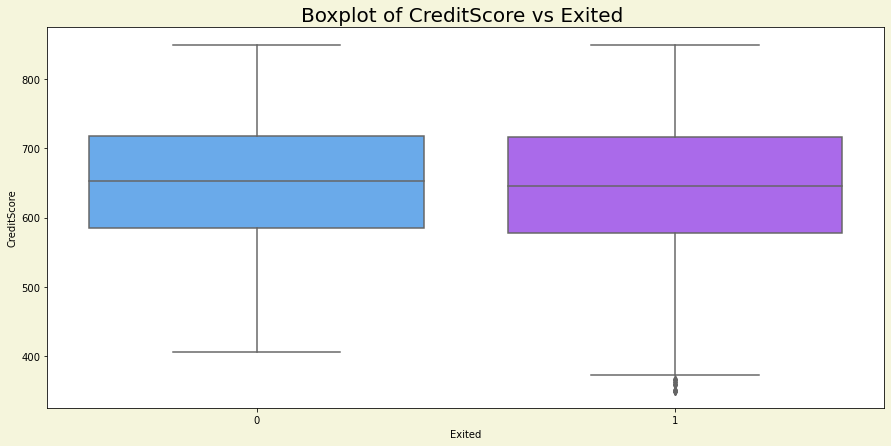

In [43]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.title('Boxplot of CreditScore vs Exited ',fontsize=(20))
sns.boxplot(data=d,y='CreditScore',x='Exited',palette='cool');

# Conclusion : Both have same distribution of credit score but there are few outliers present in the exited part.

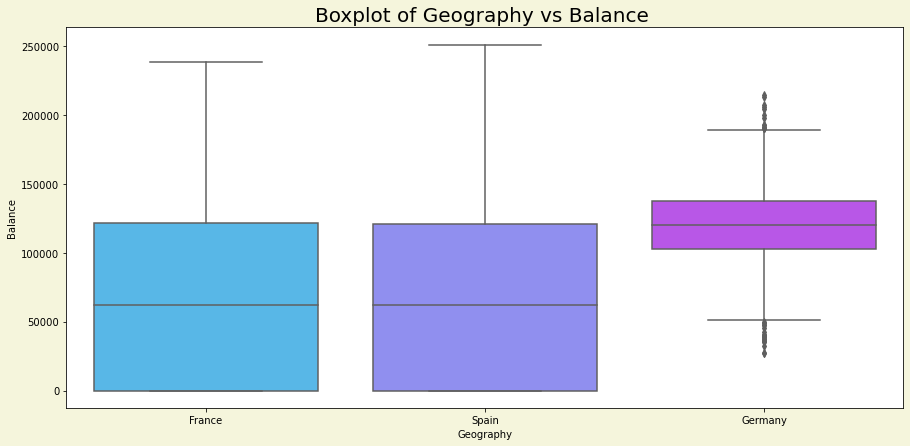

In [44]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.title('Boxplot of Geography vs Balance ',fontsize=(20))
sns.boxplot(data=d,x=d['Geography'],y=d['Balance'],palette='cool');

# Conclusion : France and germany have same balance distribution while Germany have different distribution and there are also outliers present.

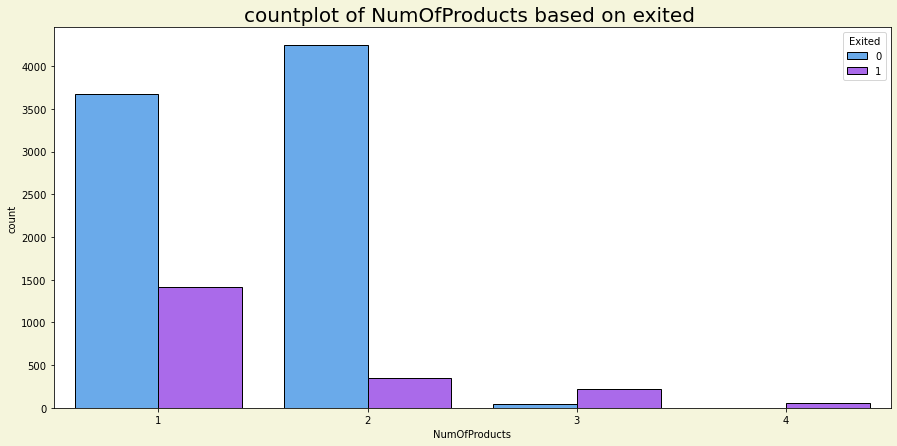

In [45]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.title('countplot of NumOfProducts based on exited ',fontsize=(20))
sns.countplot(data=df,x=df['NumOfProducts'],hue='Exited',palette='cool',ec='black');

# Conclusion:We can see that all people with Num of products 4 have Exited the bank and People with num of Products 3 have left more in with respect to the people who not exited.

# Multi variate Analysis

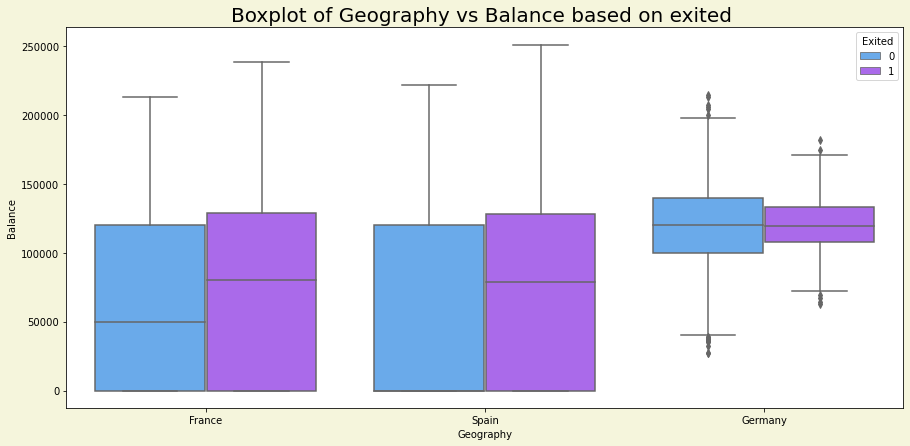

In [46]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.title('Boxplot of Geography vs Balance based on exited ',fontsize=(20))
sns.boxplot(data=d,x=d['Geography'],y=d['Balance'],hue='Exited',palette='cool');

# Conclusion: Mean balance on People from France and Spain  who exited is more compared to people who not exited .

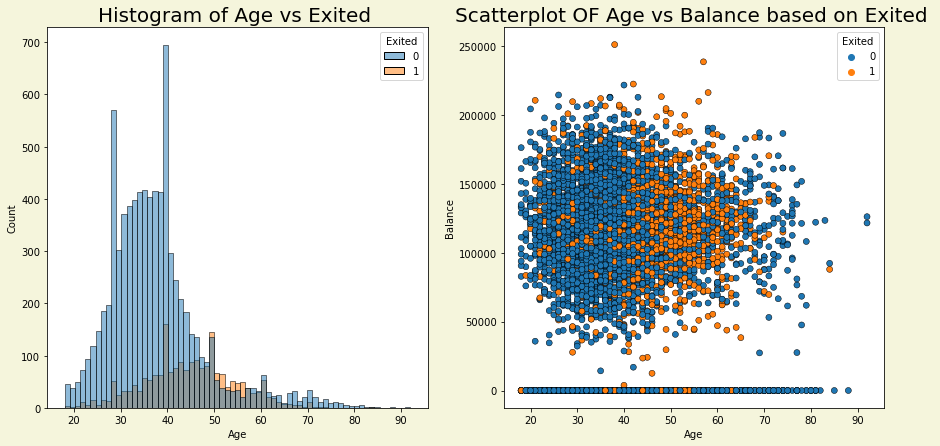

In [47]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.subplot(121)
plt.title('Histogram of Age vs Exited ',fontsize=(20))
sns.histplot(data=d,x='Age',hue='Exited');
plt.subplot(122)
plt.title('Scatterplot OF Age vs Balance based on Exited ',fontsize=(20))
sns.scatterplot(data=d,y='Balance',x='Age',hue='Exited',ec='black');

# Conclusion : From Histplot we can see that people of  50 are exited more compared to others while people of age 29 and 40 are more.

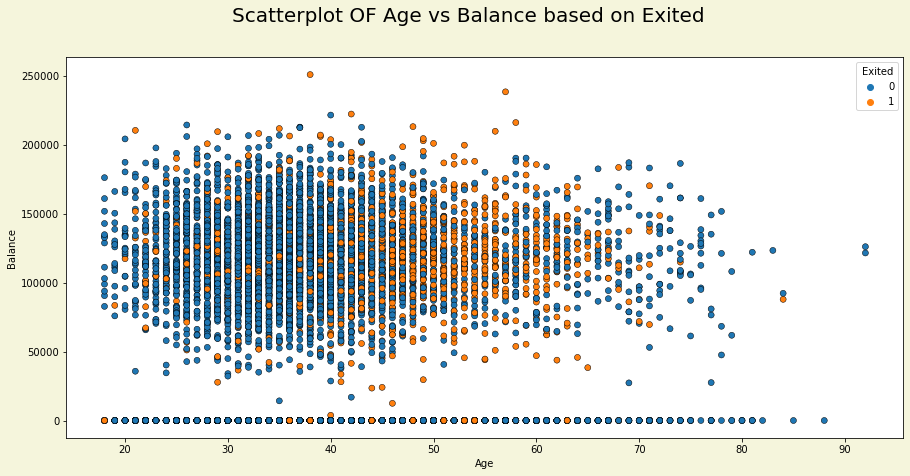

In [48]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Age vs Balance based on Exited ',fontsize=(20))
sns.scatterplot(data=d,y='Balance',x='Age',hue='Exited',ec='black');

# Conclusion: Age group of 40 to 60 Exited more compared others age groups.

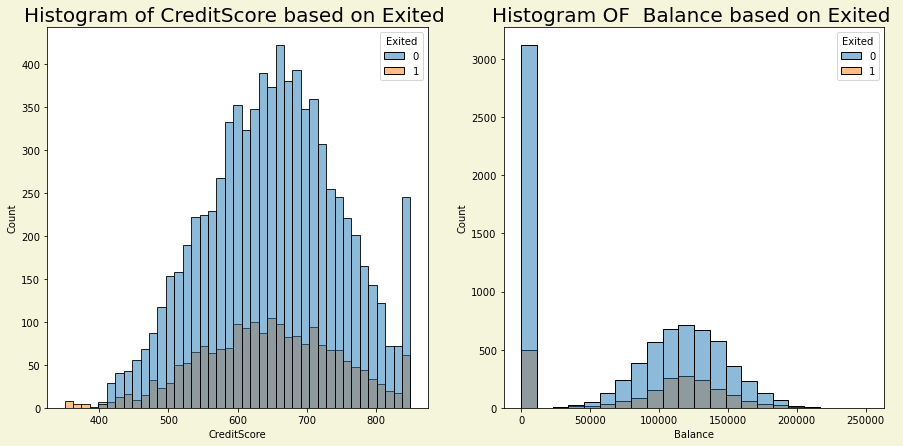

In [49]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.subplot(121)
plt.title('Histogram of CreditScore based on Exited ',fontsize=(20))
sns.histplot(data=d,x='CreditScore',hue='Exited')
plt.subplot(122)
plt.title('Histogram OF  Balance based on Exited ',fontsize=(20))
sns.histplot(data=d,x='Balance',hue='Exited');

# Conclusion:CreditScore of the less than 400 have exited while exited have normal distribution.

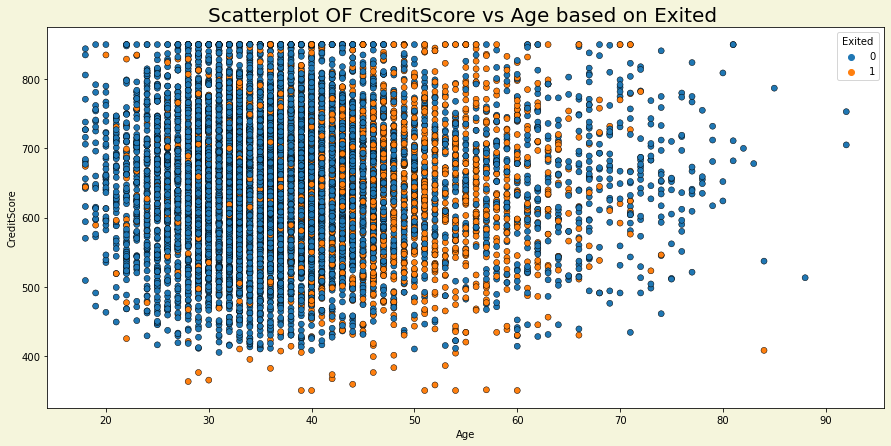

In [50]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.title('Scatterplot OF CreditScore vs Age based on Exited ',fontsize=(20))
sns.scatterplot(data=d,y='CreditScore',x='Age',hue='Exited',ec='black');

# Conclusion : We can see that people of age from 45-60 tend to Exited more.

# Model Building

In [31]:
x=scaled_df[['Age','Gender','Balance','IsActiveMember']]
y=scaled_df.Exited
f=['Age','Gender','Balance','IsActiveMember']

In [32]:
# split the data 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7000, 4) (7000,) (3000, 4) (3000,)


In [33]:
#LogisticRegression
# training the model
s_model1=LogisticRegression().fit(x_train,y_train)
# using the trained model to predict the outcome of the x_test dataset
y_pred=s_model1.predict(x_test)
print('Test score :',round(s_model1.score(x_test,y_test),2))
print('Train score ',round(s_model1.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred),3))
print('f1_score       :',round(f1_score(y_test,y_pred),2))
print('precision_score',round(precision_score(y_test,y_pred),2))
print('recall_score :',round(recall_score(y_test,y_pred),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred)) # 2x2 matrix becz there are 2 classes (binary classification)

Test score : 0.8
Train score  0.81
accuracy_score : 0.804
f1_score       : 0.25
precision_score 0.62
recall_score : 0.15
********************
confusion_matrix
[[2314   59]
 [ 530   97]]


No Skill: ROC AUC=0.500
LogisticRegression(All features): ROC AUC=0.751


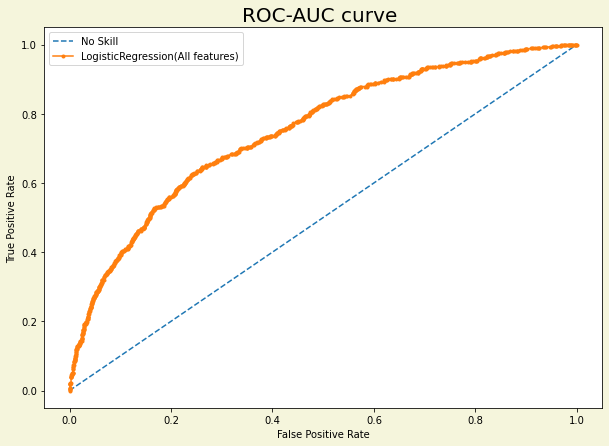

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression(All features): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression(All features)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [55]:
#LogisticRegression
# training the model
x=scaled_df[['Age']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
s_model11=LogisticRegression().fit(x_train,y_train)
# using the trained model to predict the outcome of the x_test dataset
y_pred=s_model11.predict(x_test)
print('Test score :',round(s_model11.score(x_test,y_test),2))
print('Train score ',round(s_model11.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred),3))
print('f1_score       :',round(f1_score(y_test,y_pred),2))
print('precision_score',round(precision_score(y_test,y_pred),2))
print('recall_score :',round(recall_score(y_test,y_pred),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred)) # 2x2 matrix becz there are 2 classes (binary classification)

Test score : 0.77
Train score  0.78
accuracy_score : 0.774
f1_score       : 0.03
precision_score 0.15
recall_score : 0.02
********************
confusion_matrix
[[2312   61]
 [ 616   11]]


No Skill: ROC AUC=0.500
LogisticRegression(AGE & Exited): ROC AUC=0.744


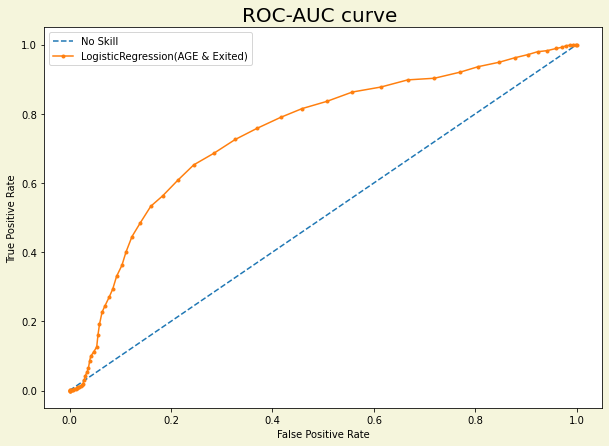

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model11.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression(AGE & Exited): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression(AGE & Exited)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [57]:
#LogisticRegression
# training the model
x=scaled_df[['Gender']]
y=scaled_df.Exited
s_model12=LogisticRegression().fit(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# using the trained model to predict the outcome of the x_test dataset
y_pred=s_model12.predict(x_test)
print('Test score :',round(s_model12.score(x_test,y_test),2))
print('Train score ',round(s_model12.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred),3))
print('f1_score       :',round(f1_score(y_test,y_pred),2))
print('precision_score',round(precision_score(y_test,y_pred),2))
print('recall_score :',round(recall_score(y_test,y_pred),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred)) # 2x2 matrix becz there are 2 classes (binary classification)

Test score : 0.43
Train score  0.43
accuracy_score : 0.43
f1_score       : 0.26
precision_score 0.18
recall_score : 0.47
********************
confusion_matrix
[[ 998 1375]
 [ 334  293]]


No Skill: ROC AUC=0.500
LogisticRegression (Gender & Exited): ROC AUC=0.444


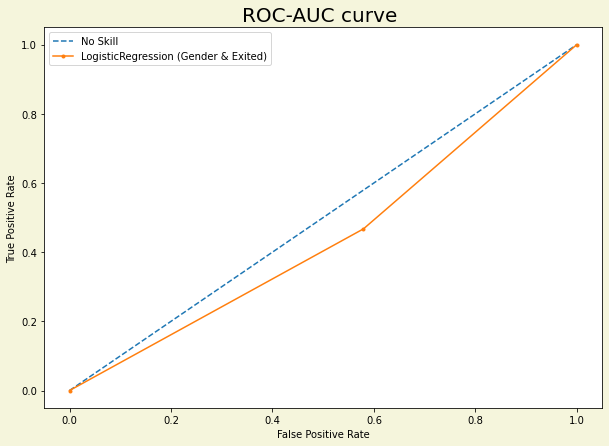

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model12.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression (Gender & Exited): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression (Gender & Exited)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [59]:
#LogisticRegression
# training the model
x=scaled_df[['Balance']]
y=scaled_df.Exited
s_model13=LogisticRegression().fit(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# using the trained model to predict the outcome of the x_test dataset
y_pred=s_model13.predict(x_test)
print('Test score :',round(s_model13.score(x_test,y_test),2))
print('Train score ',round(s_model13.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred),3))
print('f1_score       :',round(f1_score(y_test,y_pred),2))
print('precision_score',round(precision_score(y_test,y_pred),2))
print('recall_score :',round(recall_score(y_test,y_pred),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred)) # 2x2 matrix becz there are 2 classes (binary classification)

Test score : 0.79
Train score  0.8
accuracy_score : 0.791
f1_score       : 0.0
precision_score 0.0
recall_score : 0.0
********************
confusion_matrix
[[2373    0]
 [ 627    0]]


No Skill: ROC AUC=0.500
LogisticRegression (Balance & Exited): ROC AUC=0.431


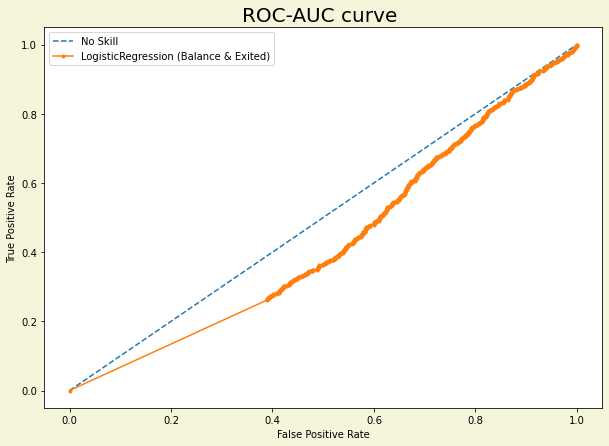

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model13.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression (Balance & Exited): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression (Balance & Exited)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [61]:
#LogisticRegression
# training the model
x=scaled_df[['IsActiveMember']]
y=scaled_df.Exited
s_model14=LogisticRegression().fit(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# using the trained model to predict the outcome of the x_test dataset
y_pred=s_model14.predict(x_test)
print('Test score :',round(s_model14.score(x_test,y_test),2))
print('Train score ',round(s_model14.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred),3))
print('f1_score       :',round(f1_score(y_test,y_pred),2))
print('precision_score',round(precision_score(y_test,y_pred),2))
print('recall_score :',round(recall_score(y_test,y_pred),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred)) # 2x2 matrix becz there are 2 classes (binary classification)

Test score : 0.79
Train score  0.8
accuracy_score : 0.791
f1_score       : 0.0
precision_score 0.0
recall_score : 0.0
********************
confusion_matrix
[[2373    0]
 [ 627    0]]


No Skill: ROC AUC=0.500
LogisticRegression (IsActiveMember & Exited): ROC AUC=0.409


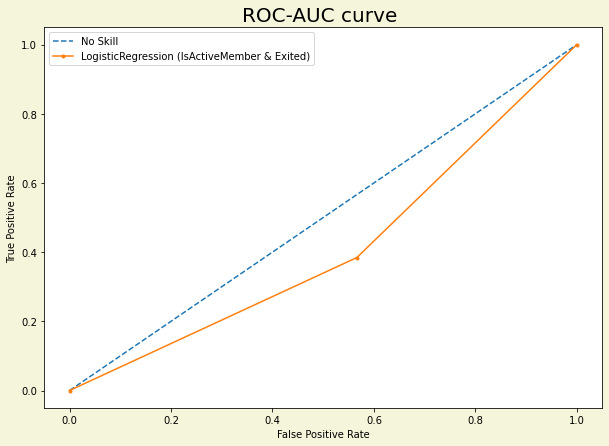

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model14.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression (IsActiveMember & Exited): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression (IsActiveMember & Exited)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [63]:
x=scaled_df[['Age','Gender','Balance','IsActiveMember']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [64]:
#Naive Bays
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
print('Test score :',round(classifier.score(x_test,y_test),2))
print('Train score ',round(classifier.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred2),3))
print('f1_score       :',round(f1_score(y_test,y_pred2),2))
print('precision_score',round(precision_score(y_test,y_pred2),2))
print('recall_score :',round(recall_score(y_test,y_pred2),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred2)) 


Test score : 0.8
Train score  0.81
accuracy_score : 0.805
f1_score       : 0.22
precision_score 0.67
recall_score : 0.13
********************
confusion_matrix
[[2333   40]
 [ 545   82]]


No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.762


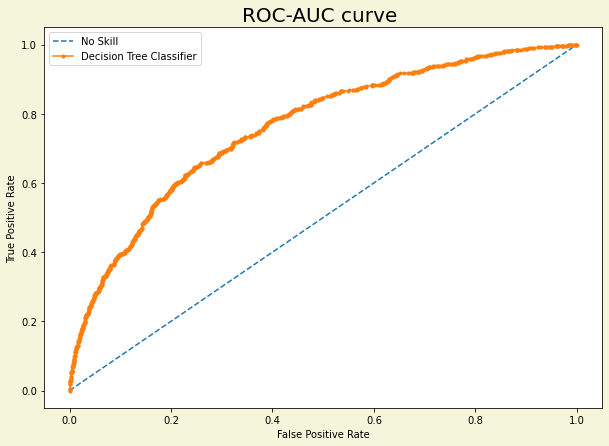

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [66]:
#DecisionTreeClassifier
classifier2=DecisionTreeClassifier()
classifier2.fit(x_train,y_train)
y_pred3=classifier2.predict(x_test)
classifier2.score(x_train,y_train)
classifier2.score(x_test,y_test)
print('Test score :',round(classifier2.score(x_test,y_test),2))
print('Train score ',round(classifier2.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred3),3))
print('f1_score       :',round(f1_score(y_test,y_pred3),3))
print('precision_score',round(precision_score(y_test,y_pred3),3))
print('recall_score :',round(recall_score(y_test,y_pred3),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred3))

Test score : 0.77
Train score  0.96
accuracy_score : 0.772
f1_score       : 0.403
precision_score 0.446
recall_score : 0.37
********************
confusion_matrix
[[2086  287]
 [ 396  231]]


No Skill: ROC AUC=0.500
DecisionTreeClassifier: ROC AUC=0.618


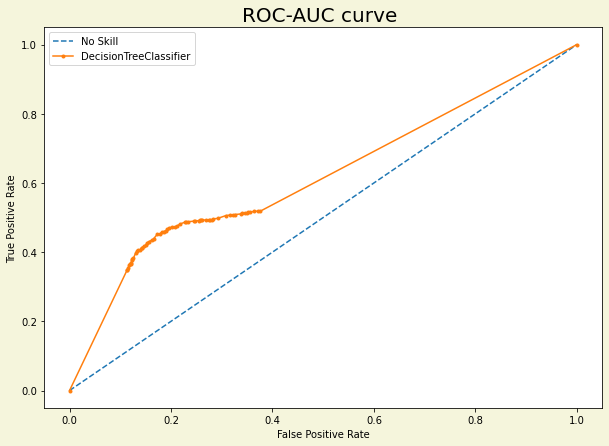

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier2.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTreeClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [68]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=4, shuffle=False, random_state=None)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 1), x, y, cv= kf,scoring="f1_weighted") # split=3
    print(f'For max depth: {val}')
    #rmse(score.mean())
    print('f1 :',round(score.mean(),4))

For max depth: 1
f1 : 0.706
For max depth: 2
f1 : 0.8059
For max depth: 3
f1 : 0.7817
For max depth: 4
f1 : 0.7995
For max depth: 5
f1 : 0.796
For max depth: 6
f1 : 0.8043
For max depth: 7
f1 : 0.8009
For max depth: 8
f1 : 0.801
For max depth: 9
f1 : 0.8025
For max depth: 10
f1 : 0.7985
For max depth: 11
f1 : 0.7936
For max depth: 12
f1 : 0.7938
For max depth: 13
f1 : 0.7895
For max depth: 14
f1 : 0.7837
For max depth: 15
f1 : 0.783


In [69]:
#DecisionTreeClassifier with tuning
classifier22=DecisionTreeClassifier(max_depth=2,random_state=0)
classifier22.fit(x_train,y_train)
y_pred33=classifier22.predict(x_test)
classifier22.score(x_train,y_train)
classifier22.score(x_test,y_test)
print('Test score :',round(classifier22.score(x_test,y_test),2))
print('Train score ',round(classifier22.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred33),3))
print('f1_score       :',round(f1_score(y_test,y_pred33),3))
print('precision_score',round(precision_score(y_test,y_pred33),3))
print('recall_score :',round(recall_score(y_test,y_pred33),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred33))

Test score : 0.82
Train score  0.82
accuracy_score : 0.818
f1_score       : 0.473
precision_score 0.599
recall_score : 0.39
********************
confusion_matrix
[[2209  164]
 [ 382  245]]


In [88]:
f

['Age', 'Gender', 'Balance', 'IsActiveMember']

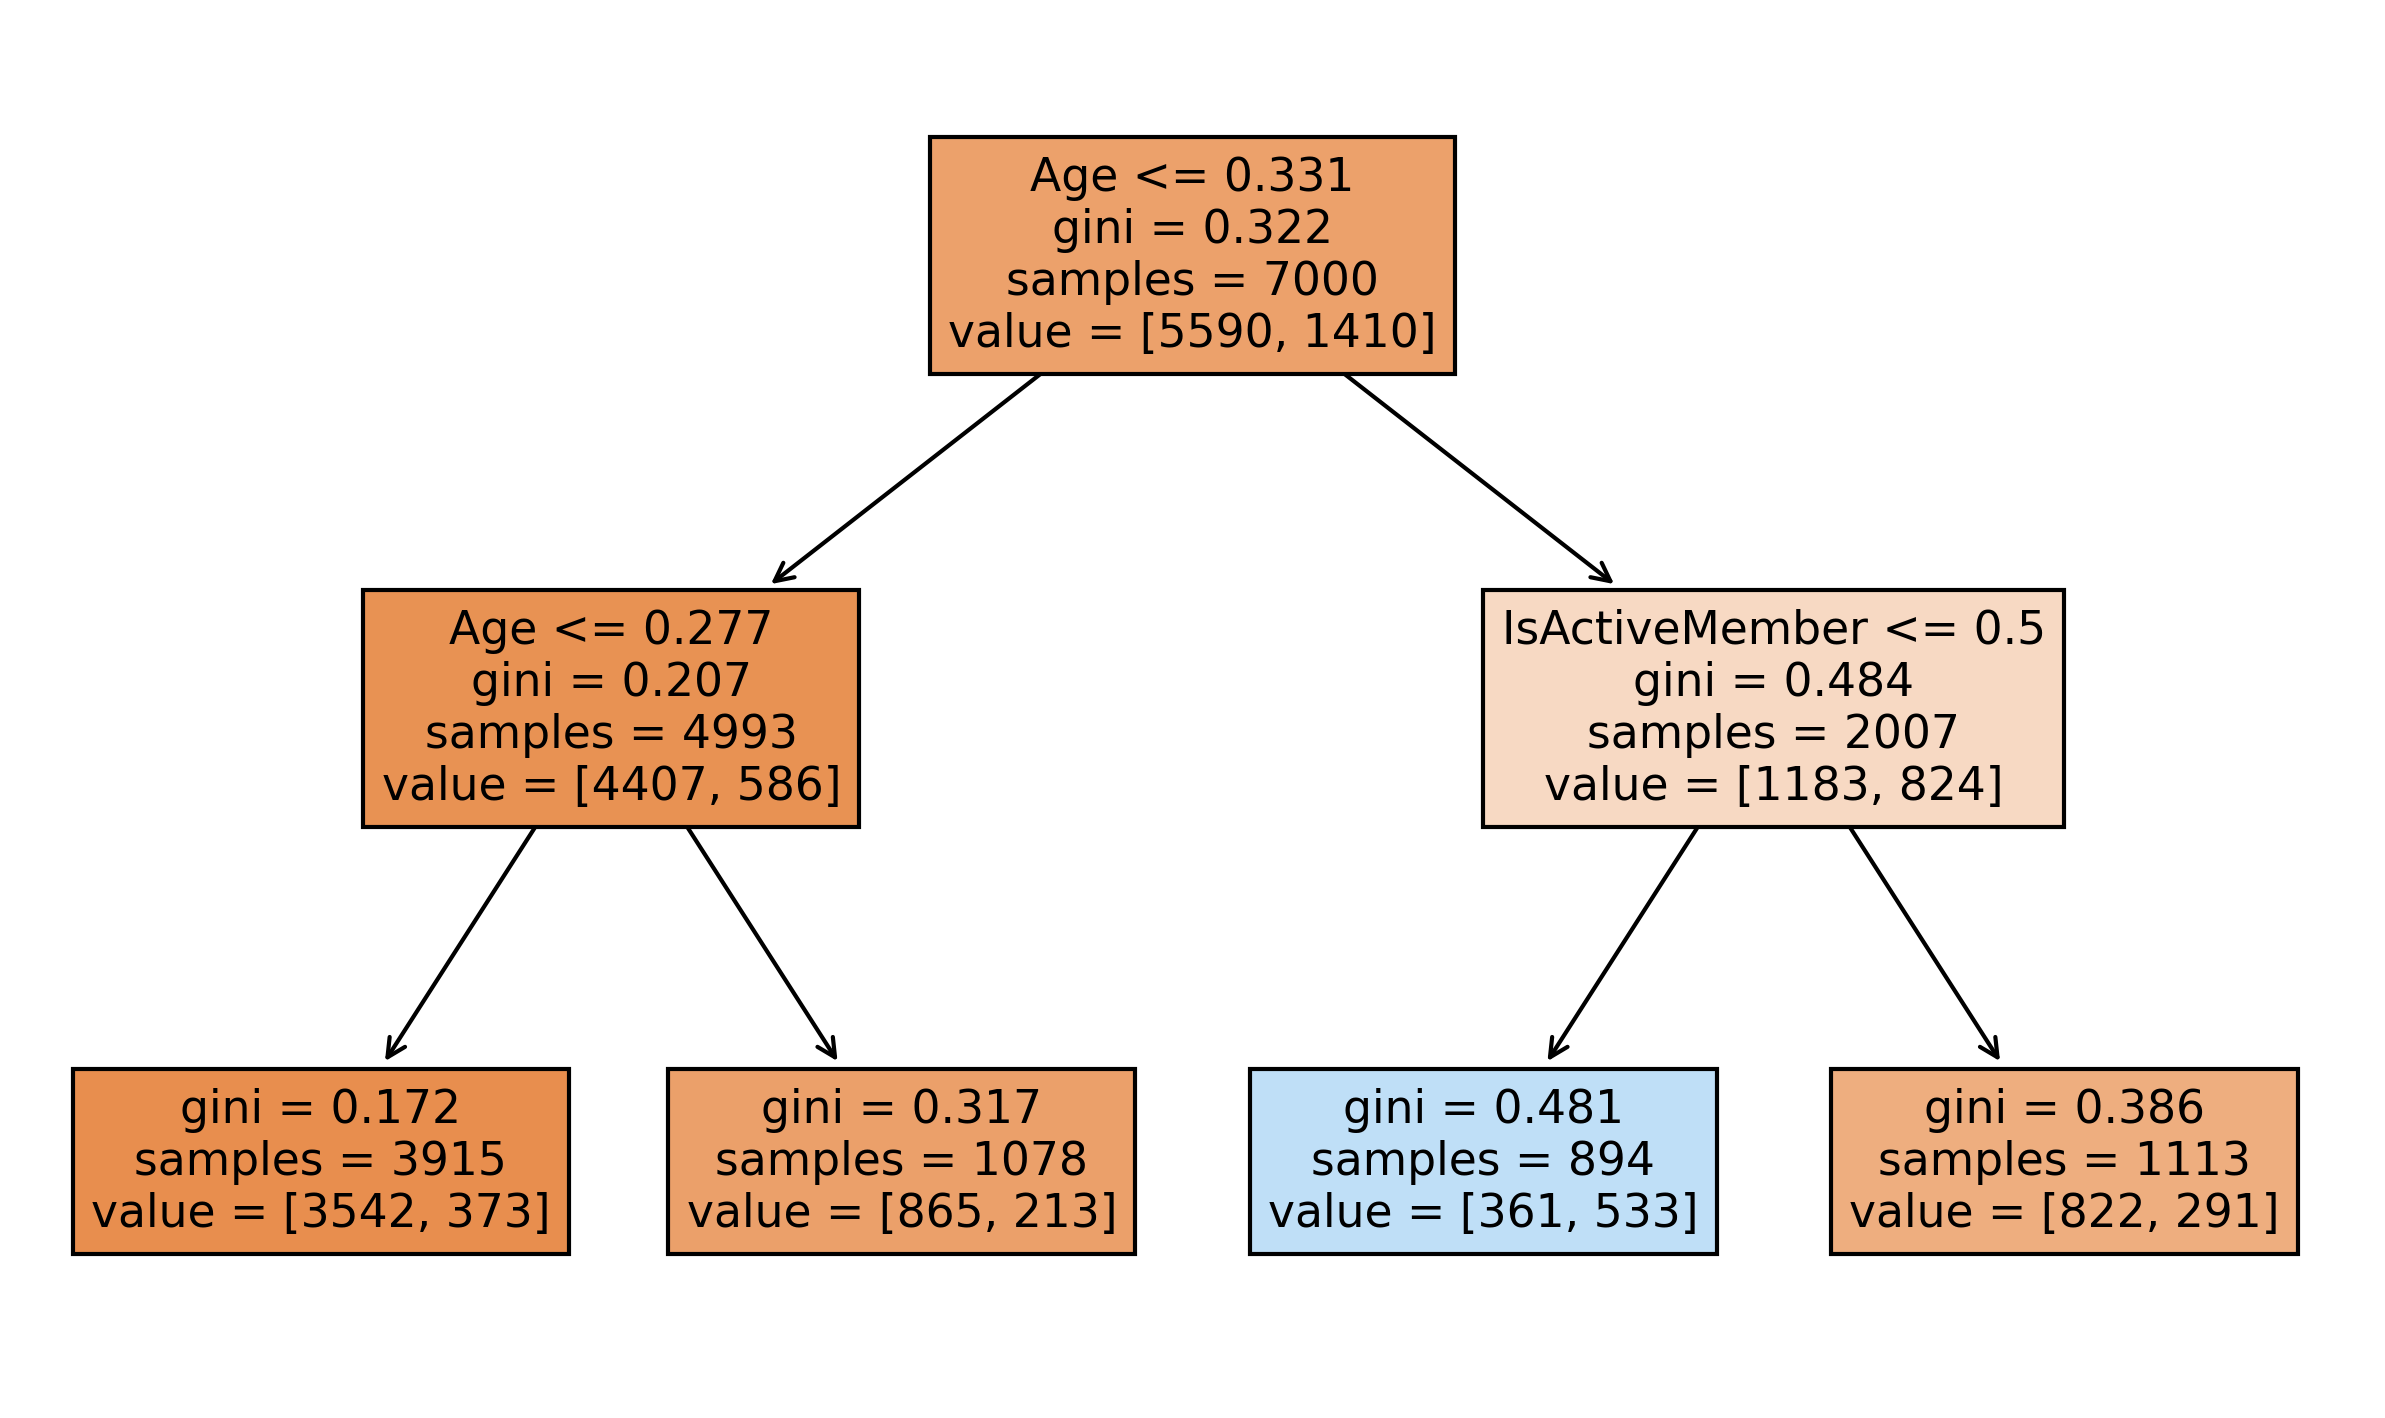

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6),dpi=300)
tree.plot_tree(classifier22,feature_names=f,filled=True)
plt.show()

No Skill: ROC AUC=0.500
DecisionTreeClassifier with tuning: ROC AUC=0.746


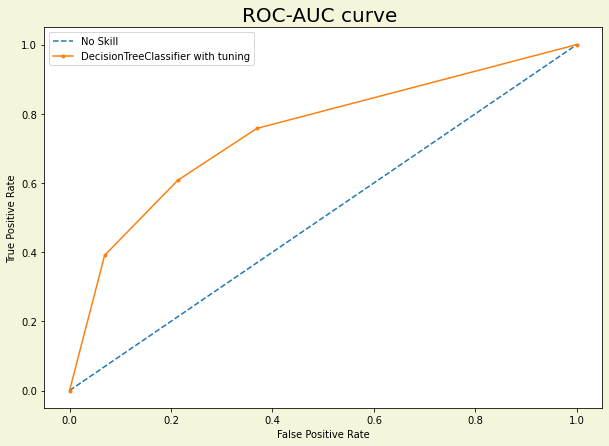

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier22.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier with tuning: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTreeClassifier with tuning')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [74]:
# RandomForestClassifier
regressor = RandomForestClassifier(oob_score=True) 
s_model4 = regressor.fit(x_train, y_train)
y_pred4 = s_model4.predict(x_test)
print('Test score :',round(regressor.score(x_test,y_test),2))
print('Train score ',round(regressor.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred4),3))
print('f1_score       :',round(f1_score(y_test,y_pred4),3))
print('precision_score',round(precision_score(y_test,y_pred4),3))
print('recall_score :',round(recall_score(y_test,y_pred4),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred4))

Test score : 0.8
Train score  0.96
accuracy_score : 0.796
f1_score       : 0.425
precision_score 0.516
recall_score : 0.36
********************
confusion_matrix
[[2160  213]
 [ 400  227]]


No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.726


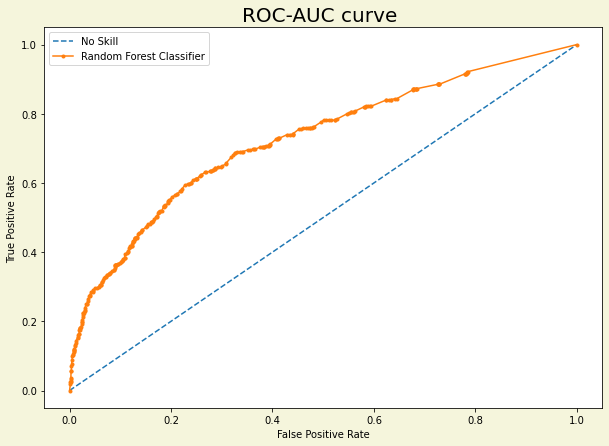

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model4.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [76]:
# Hyperparameter tuning for Random Forest using GridSearchCV
# defining model
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# defining model parameters
params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}
# defining grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=params_rf,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)
# best parameters for the model
grid_search.best_estimator_

Fitting 4 folds for each of 180 candidates, totalling 720 fits


RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [77]:
regressor = RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=10,n_jobs=-1, random_state=42) 
s_model44= regressor.fit(x_train, y_train)
y_pred44 = s_model44.predict(x_test)
print('Test score :',round(s_model44.score(x_test,y_test),2))
print('Train score ',round(s_model44.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred44),3))
print('f1_score       :',round(f1_score(y_test,y_pred44),3))
print('precision_score',round(precision_score(y_test,y_pred44),3))
print('recall_score :',round(recall_score(y_test,y_pred44),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred44))

Test score : 0.83
Train score  0.84
accuracy_score : 0.827
f1_score       : 0.421
precision_score 0.704
recall_score : 0.3
********************
confusion_matrix
[[2294   79]
 [ 439  188]]


No Skill: ROC AUC=0.500
Random Forest Classifier (tuning): ROC AUC=0.791


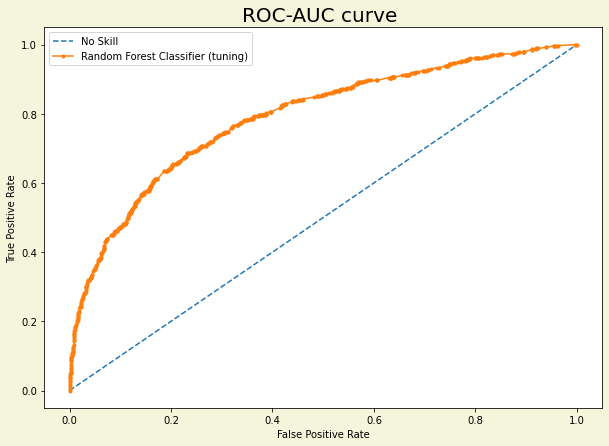

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = s_model44.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs) # logistic reg line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier (tuning): ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10,7),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier (tuning)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [79]:
#Bagging With Random Forest
# define the model
model1 = RandomForestClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores1 = cross_val_score(model1, x, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
print('f1-Score: %.3f (%.3f)' % (np.mean(f1_scores1), np.std(f1_scores1)))


f1-Score: 0.416 (0.029)


In [80]:
model1=RandomForestClassifier(max_depth=10,min_samples_leaf=5,n_estimators=50,random_state=10)
model1.fit(x_train,y_train)
y_predm1=model1.predict(x_test)
print('Test score :',round(regressor.score(x_test,y_test),2))
print('Train score ',round(regressor.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_predm1),3))
print('f1_score       :',round(f1_score(y_test,y_predm1),3))
print('precision_score',round(precision_score(y_test,y_predm1),3))
print('recall_score :',round(recall_score(y_test,y_predm1),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_predm1))

Test score : 0.83
Train score  0.84
accuracy_score : 0.826
f1_score       : 0.446
precision_score 0.667
recall_score : 0.33
********************
confusion_matrix
[[2268  105]
 [ 417  210]]


In [81]:
#Boosting using Adaboost
from sklearn.ensemble import AdaBoostClassifier
# define the model
model2 = AdaBoostClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores2 = cross_val_score(model2, x, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
print('f1-Score: %.3f (%.3f)' % (np.mean(f1_scores2),np.std(f1_scores2)))


f1-Score: 0.440 (0.042)


In [82]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier(n_estimators=200,random_state=10,)
model2.fit(x_train,y_train)
y_predm2=model2.predict(x_test)
print('Test score :',round(model2.score(x_test,y_test),2))
print('Train score ',round(model2.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_predm2),3))
print('f1_score       :',round(f1_score(y_test,y_predm2),3))
print('precision_score',round(precision_score(y_test,y_predm2),3))
print('recall_score :',round(recall_score(y_test,y_predm2),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_predm2))

Test score : 0.82
Train score  0.84
accuracy_score : 0.823
f1_score       : 0.428
precision_score 0.657
recall_score : 0.32
********************
confusion_matrix
[[2269  104]
 [ 428  199]]


In [83]:
from sklearn.ensemble import StackingClassifier
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [84]:
# define the model
model3 = get_stacking()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model3, x, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


F1-Score: 0.331 (0.031)


In [85]:
model3.fit(x_train,y_train)
y_pred7 =model3.predict(x_test)
print('Test score :',round(model3.score(x_test,y_test),2))
print('Train score ',round(model3.score(x_train,y_train),2))
print('accuracy_score :',round(accuracy_score(y_test,y_pred7),3))
print('f1_score       :',round(f1_score(y_test,y_pred7),3))
print('precision_score',round(precision_score(y_test,y_pred7),3))
print('recall_score :',round(recall_score(y_test,y_pred7),2))
print('********************')
print('confusion_matrix')
print(   confusion_matrix(y_test,y_pred7))

Test score : 0.81
Train score  0.85
accuracy_score : 0.812
f1_score       : 0.345
precision_score 0.638
recall_score : 0.24
********************
confusion_matrix
[[2289   84]
 [ 479  148]]


In [86]:
data=pd.DataFrame()
data['Model     ']=['Model Type','Test score','Train score','accuracy_score','f1_score','precision_score','recall_score','ROC-AUC score']
data["Model    1"]=['Logistic Regression (All features)',0.8,0.81,0.804,0.25,0.62,0.15,0.75]
data["Model    2"]=['Logistic Regression (AGE & Exited)',0.7,0.78,0.774,0.03,0.15,0.02,0.74]
data["Model    3"]=['Logistic Regression (Gender & Exited)',0.43,0.43,0.43,0.26,0.18,0.47,0.44]
data["Model    4"]=['Logistic Regression (Balance & Exited)',0.79,0.8,0.79,0,0,0,0.55]
data['Model    5']=["Logistic Regression (IsActiveMember & Exited)",0.79,0.80,0.79,0,0,0,0.76]
data['Model    6']=["Naive Bayes",0.8,0.81,0.80,0.22,0.67,0.13,0.76]
data['Model    7']=["Decision Tree Classifier ",0.77,0.96,0.77,0.40,0.44,0.37,0.62]
data['Model    8']=["Decision Tree Classifier  (tuning)",0.82,0.82,0.81,0.473,0.59,0.39,0.74]
data['Model    9']=["Random Forest Classifier",0.8,0.96,0.79,0.426,0.514,0.36,0.72]
data['Model    10']=["Random Forest Classifier (tuning)",0.83,0.84,0.827,0.42,0.704,0.3,0.79]
data['Model    11']=["Bagging With Random Forest",0.83,0.84,0.826,0.44,0.66,0.33,0.776]
data['Model    12']=["Boosting using Adaboost",0.82,0.84,0.82,0.42,0.65,0.32,0.779]
data['Model    13']=["Stacking",0.81,0.85,0.814,0.35,0.64,0.24,0.76]
data















,Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13
0,Model Type,Logistic Regression (All features),Logistic Regression (AGE & Exited),Logistic Regression (Gender & Exited),Logistic Regression (Balance & Exited),Logistic Regression (IsActiveMember & Exited),Naive Bayes,Decision Tree Classifier,Decision Tree Classifier (tuning),Random Forest Classifier,Random Forest Classifier (tuning),Bagging With Random Forest,Boosting using Adaboost,Stacking
1,Test score,0.8,0.7,0.43,0.79,0.79,0.8,0.77,0.82,0.8,0.83,0.83,0.82,0.81
2,Train score,0.81,0.78,0.43,0.8,0.8,0.81,0.96,0.82,0.96,0.84,0.84,0.84,0.85
3,accuracy_score,0.804,0.774,0.43,0.79,0.79,0.8,0.77,0.81,0.79,0.827,0.826,0.82,0.814
4,f1_score,0.25,0.03,0.26,0,0,0.22,0.4,0.473,0.426,0.42,0.44,0.42,0.35
5,precision_score,0.62,0.15,0.18,0,0,0.67,0.44,0.59,0.514,0.704,0.66,0.65,0.64
6,recall_score,0.15,0.02,0.47,0,0,0.13,0.37,0.39,0.36,0.3,0.33,0.32,0.24
7,ROC-AUC score,0.75,0.74,0.44,0.55,0.76,0.76,0.62,0.74,0.72,0.79,0.776,0.779,0.76


# Conclusion :Decision Tree Classifier (tuning) has more accuracy_score,f1_score so we will consider it as a best model.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751
Logistic with age and Exited: ROC AUC=0.744
Logistic with gender and Exited: ROC AUC=0.444
Logistic with balance and Exited: ROC AUC=0.556
LogisticRegression (IsActiveMember & Exited): ROC AUC=0.409
Nb: ROC AUC=0.762
Decision Tree Classifier: ROC AUC=0.618
Decision Tree Classifier (tuning): ROC AUC=0.746
Random Forest Classifier: ROC AUC=0.726
Random Forest Classifier (tuning): ROC AUC=0.791
Bagging With Random Forest: ROC AUC=0.776
Boosting using Adaboost: ROC AUC=0.779
Stacking: ROC AUC=0.761


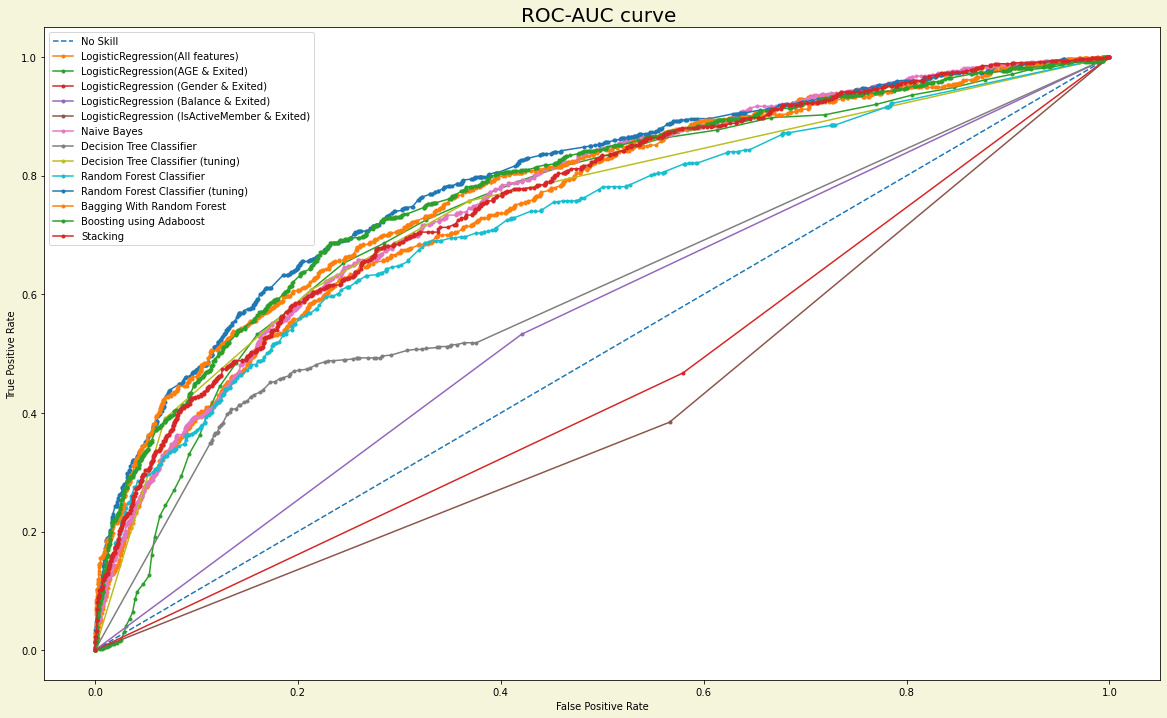

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
x=scaled_df[['Age','Gender','Balance','IsActiveMember']]
y=scaled_df.Exited
lr_probs = s_model1.predict_proba(x_test)
x=scaled_df[['Age']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr_probs2 = s_model11.predict_proba(x_test)#
x=scaled_df[['Gender']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr_probs3 = s_model12.predict_proba(x_test)#
x=scaled_df[['Gender']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr_probs4 = s_model13.predict_proba(x_test)#
x=scaled_df[['IsActiveMember']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr_probs5 = s_model14.predict_proba(x_test)#
x=scaled_df[['Age','Gender','Balance','IsActiveMember']]
y=scaled_df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

lr_probs6 = classifier.predict_proba(x_test)
lr_probs7 = classifier2.predict_proba(x_test)
lr_probs8 = classifier22.predict_proba(x_test)
lr_probs9 = s_model4.predict_proba(x_test)
lr_probs10 = s_model44.predict_proba(x_test)
lr_probs11 = model1.predict_proba(x_test)
lr_probs12 = model2.predict_proba(x_test)
lr_probs13 = model3.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]
lr_probs6 = lr_probs6[:, 1]
lr_probs7 = lr_probs7[:, 1]
lr_probs8 = lr_probs8[:, 1]
lr_probs9 = lr_probs9[:, 1]
lr_probs10 = lr_probs10[:, 1]
lr_probs11 = lr_probs11[:, 1]
lr_probs12 = lr_probs12[:, 1]
lr_probs13 = lr_probs13[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs) # no skill line
lr_auc = roc_auc_score(y_test, lr_probs)# logistic reg line
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)
lr_auc4 = roc_auc_score(y_test, lr_probs4)
lr_auc5 = roc_auc_score(y_test, lr_probs5)
lr_auc6 = roc_auc_score(y_test, lr_probs6)
lr_auc7 = roc_auc_score(y_test, lr_probs7)
lr_auc8 = roc_auc_score(y_test, lr_probs8)
lr_auc9= roc_auc_score(y_test, lr_probs9)
lr_auc10= roc_auc_score(y_test, lr_probs10)
lr_auc11 = roc_auc_score(y_test, lr_probs11)
lr_auc12 = roc_auc_score(y_test, lr_probs12)
lr_auc13 = roc_auc_score(y_test, lr_probs13)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic with age and Exited: ROC AUC=%.3f' % (lr_auc2))
print('Logistic with gender and Exited: ROC AUC=%.3f' % (lr_auc3))
print('Logistic with balance and Exited: ROC AUC=%.3f' % (lr_auc4))
print('LogisticRegression (IsActiveMember & Exited): ROC AUC=%.3f' % (lr_auc5))
print('Nb: ROC AUC=%.3f' % (lr_auc6))
print('Decision Tree Classifier: ROC AUC=%.3f' % (lr_auc7))
print('Decision Tree Classifier (tuning): ROC AUC=%.3f' % (lr_auc8))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc9))
print('Random Forest Classifier (tuning): ROC AUC=%.3f' % (lr_auc10))
print('Bagging With Random Forest: ROC AUC=%.3f' % (lr_auc11))
print('Boosting using Adaboost: ROC AUC=%.3f' % (lr_auc12))
print('Stacking: ROC AUC=%.3f' % (lr_auc13))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)
lr_fpr2, lr_tpr2,_= roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3,_= roc_curve(y_test, lr_probs3)
lr_fpr4, lr_tpr4,_= roc_curve(y_test, lr_probs4)
lr_fpr5, lr_tpr5,_= roc_curve(y_test, lr_probs5)
lr_fpr6, lr_tpr6,_= roc_curve(y_test, lr_probs6)
lr_fpr7, lr_tpr7,_= roc_curve(y_test, lr_probs7)
lr_fpr8, lr_tpr8,_= roc_curve(y_test, lr_probs8)
lr_fpr9, lr_tpr9,_= roc_curve(y_test, lr_probs9)
lr_fpr10, lr_tpr10,_= roc_curve(y_test, lr_probs10)
lr_fpr11, lr_tpr11,_= roc_curve(y_test, lr_probs11)
lr_fpr12, lr_tpr12,_= roc_curve(y_test, lr_probs12)
lr_fpr13, lr_tpr13,_= roc_curve(y_test, lr_probs13)
# plot the roc curve for the model
plt.figure(figsize=(20,12),facecolor='beige')
plt.title('ROC-AUC curve ',fontsize=20)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression(All features)')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='LogisticRegression(AGE & Exited)')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='LogisticRegression (Gender & Exited)')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label='LogisticRegression (Balance & Exited)')
plt.plot(lr_fpr5, lr_tpr5, marker='.', label='LogisticRegression (IsActiveMember & Exited)')
plt.plot(lr_fpr6, lr_tpr6, marker='.', label='Naive Bayes')
plt.plot(lr_fpr7, lr_tpr7, marker='.', label='Decision Tree Classifier')
plt.plot(lr_fpr8, lr_tpr8, marker='.', label='Decision Tree Classifier (tuning)')
plt.plot(lr_fpr9, lr_tpr9, marker='.', label='Random Forest Classifier')
plt.plot(lr_fpr10, lr_tpr10, marker='.', label='Random Forest Classifier (tuning)')
plt.plot(lr_fpr11, lr_tpr11, marker='.', label='Bagging With Random Forest')
plt.plot(lr_fpr12, lr_tpr12, marker='.', label='Boosting using Adaboost')
plt.plot(lr_fpr13, lr_tpr13, marker='.', label='Stacking')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# conclusion :
# Random Forest Classifier (tuning): ROC AUC=0.791 is highest followed by Decision Tree Classifier (tuning): ROC AUC=0.746.

# Conclusion
### 1. 79.63% are not Exited while 20.37% are Exited
### 2. Germany has more Exited clients while France lowest.
### 3. If we compare count of both People with card and without card who exited with people with card and without 
###    card who Not exited the Percent difference is more for the people who has no card.
### 4. Not active member tend to exit more than people with active member find the way to make this customer active member from non active member.
### 5. The people with tenure of 1-9 have almost same exited rate but the exit rate of people with 0 and 10 tenure 
### is more if we compare it with the value counts of the people who did not exited.
### 6. Female have more exited rate than male apecial offers should be made for female customer.
### 7. We can see that all people with Num of products 4 have Exited the bank and People with num of Products 3 have 
###    left more in with respect to the people who not exited so this product used by this churn people should be worked upon. 
### 8. we can see that people of 50 age are exited more compared to others while people of age 29 and 40 are more.
### 9. CreditScore of the less than 400 have exited.
### 10.We can see that people of age from 45-60 tend to Exited more so special offer can be made to decrease the churn rate.
